In [79]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(2)

In [80]:
#load the dataset
dataset=pd.read_csv(r'C:\Users\Talion\Desktop\DataSciencesProjects\20190709 credit card fraud detection\3. uploaded data\creditcard.csv')

# Data Exploration & visualization

In [81]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### we have a total 28 columns with just numbers;we don't know anything about these numbers becuase they are anonymized.

In [82]:
print(dataset.shape)
dataset.describe()

#Amount:the amount of transaction
#class: 1 for fraud 0 for non-fraud


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [83]:
# let see if we have missing data or not
dataset.isnull().any().sum()

0

### draw some charts to gain some insights:

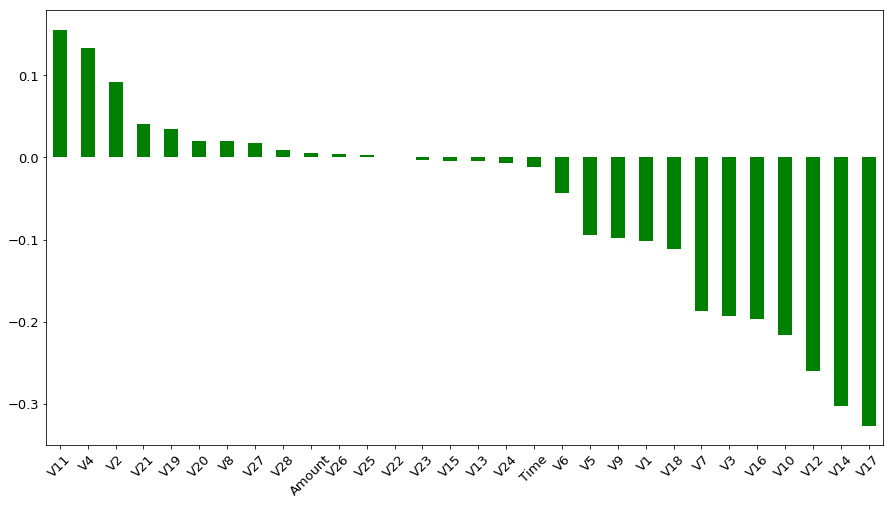

In [84]:
f_class=dataset.Class
features=dataset.drop(columns=['Class'])

cor=features.corrwith(f_class).sort_values(ascending=False)
plt.figure(figsize=(15,8))
cor.plot.bar(rot=45,fontsize=13,color='green')

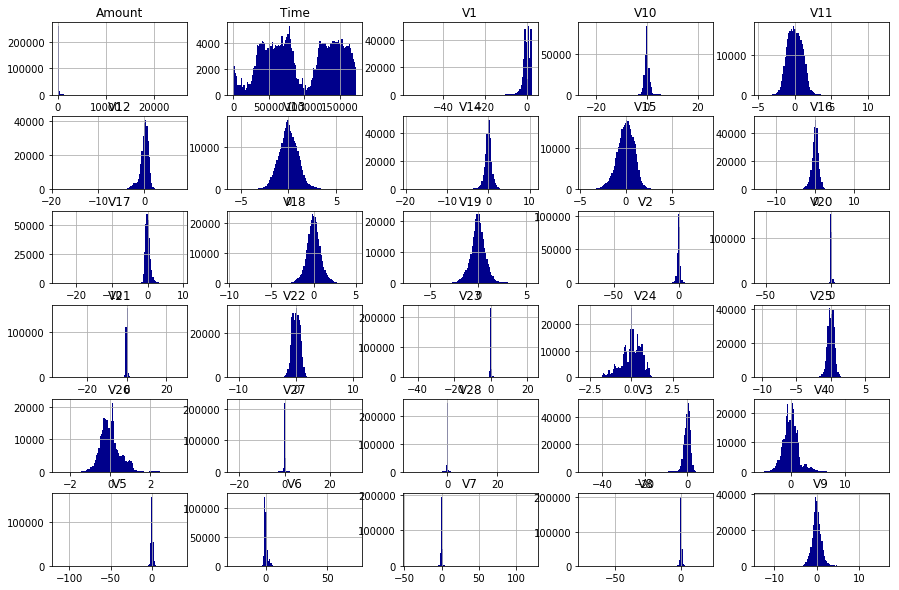

In [85]:

features.hist(bins=100,figsize=(15,10),color='darkblue');

 since pie chart does not accept negative values we are not gonna do it (i love pies!)

 needless to say it's not even that neccesary 

In [86]:
#nomalizng the 'Amount' column becuase its scale is so diffrent compared with rest of the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset['Amount_Scaled']=scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset=dataset.drop(['Amount'],axis=1)
# standard scaler needs 2d array so we can't feed it 1dimensional pandas series
# ''.reshape' is Available for numpy array so we hade to first convert our series to array via'.values'

In [87]:
#using time series is whole another matter.we don't wanna use it for this project
dataset=dataset.drop(['Time'],axis=1)

In [88]:
X=dataset.drop(['Class'],axis=1) #this is a data frame
y=dataset['Class']             #this is a series

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [90]:
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [91]:
#converting our data to arrays before feeding it into NN
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

## Deep Learning:

In [92]:
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [93]:
model=Sequential([Dense(units=16,input_dim=29,activation='relu'),
            Dense(units=24,activation='relu'),
            Dropout(0.5),
            Dense(20,activation='relu'),
             Dense(24,activation='relu'),      
            Dense(1, activation='sigmoid')])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_22 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_24 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [94]:
#training our neural network
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 14s 71us/step - loss: 0.0135 - acc: 0.9966
Epoch 2/5
199364/199364 [==============================] - 11s 54us/step - loss: 0.0038 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 10s 51us/step - loss: 0.0034 - acc: 0.9993
Epoch 4/5
199364/199364 [==============================] - 13s 64us/step - loss: 0.0030 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 9s 44us/step - loss: 0.0029 - acc: 0.9994


In [95]:
model.evaluate(X_test,y_test)

85443/85443 [==============================] - 2s 20us/step


[0.0036764819152118483, 0.9994499256814484]

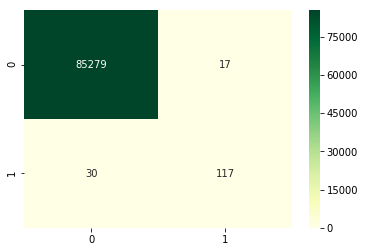

In [96]:
from sklearn.metrics import confusion_matrix
y_predict=model.predict(X_test)
cor=confusion_matrix(y_test,y_predict.round())
sns.heatmap(cor,annot=True,fmt='g',cmap='YlGn')

we have an extremly biases and unbalanced dataset

although the total accuracy is very good but the accuracy for fraud classes is not satisfying at all

##### now we can try so many more models but as long as our data is  unbalanced its not gonna change anything


# Balancing

### undersampling

In [97]:
fraud_indices=np.array(dataset[dataset.Class==1].index)
number_of_frauds=len(fraud_indices)
#now let's randomly choose some non_frauds with length of frauds
non_fraud_indices=np.array(dataset[dataset.Class==0].index)
non_fraud_chosen=np.random.choice(non_fraud_indices,size=number_of_frauds,replace=False)


In [98]:
chosen_indices=np.concatenate([fraud_indices,non_fraud_chosen])

#### creat new dataset with created samples and then do the whole modeling

In [99]:
dataset2=dataset.iloc[chosen_indices,:]

In [100]:
dataset2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [102]:
new_X=dataset2.drop(['Class'],axis=1)
new_y=dataset2['Class']             
X_train,X_test,y_train,y_test=train_test_split(new_X,new_y,test_size=0.3,random_state=0)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [103]:
model=Sequential([Dense(units=16,input_dim=29,activation='relu'),
            Dense(units=24,activation='relu'),
            Dropout(0.5),
            Dense(20,activation='relu'),
             Dense(24,activation='relu'),      
            Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 1s 1ms/step - loss: 0.6958 - acc: 0.5102
Epoch 2/5
688/688 [==============================] - 0s 124us/step - loss: 0.4346 - acc: 0.7674
Epoch 3/5
688/688 [==============================] - 0s 119us/step - loss: 0.3564 - acc: 0.8983
Epoch 4/5
688/688 [==============================] - 0s 128us/step - loss: 0.2947 - acc: 0.9317
Epoch 5/5
688/688 [==============================] - 0s 123us/step - loss: 0.2434 - acc: 0.9201


In [104]:
model.evaluate(X_test,y_test)

296/296 [==============================] - 0s 660us/step


[0.21598799889152115, 0.9256756756756757]

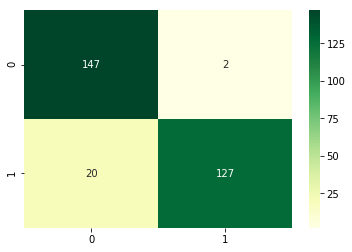

In [105]:
y_predict=model.predict(X_test)
cor=confusion_matrix(y_test,y_predict.round())
sns.heatmap(cor,annot=True,fmt='g',cmap='YlGn')

##### that's much better! bu can we do even better?

### oversampling(SMOTE)

In [106]:
import imblearn
from imblearn.over_sampling import SMOTE

In [107]:
X_resample,y_resample=SMOTE().fit_sample(X,y.values.ravel())

In [108]:
pd.value_counts(y_resample)

1    284315
0    284315
dtype: int64

ok it seems it has done the job

In [109]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)


In [110]:
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.3,random_state=0)

model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 41s 104us/step - loss: 0.0401 - acc: 0.9864
Epoch 2/5
398041/398041 [==============================] - 37s 94us/step - loss: 0.0167 - acc: 0.9956
Epoch 3/5
398041/398041 [==============================] - 37s 93us/step - loss: 0.0121 - acc: 0.9970
Epoch 4/5
398041/398041 [==============================] - 37s 93us/step - loss: 0.0110 - acc: 0.9974
Epoch 5/5
398041/398041 [==============================] - 46s 115us/step - loss: 0.0094 - acc: 0.9978


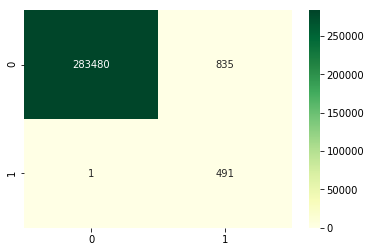

In [111]:
y_predict_with_smoth=model.predict(X)
y_actual=pd.DataFrame(y)
cor=confusion_matrix(y_actual,y_predict_with_smoth.round())
sns.heatmap(cor,annot=True,fmt='g',cmap='YlGn')

Awesome! we nailed it


so imbalanced data set can hugely deteriorate our model accuracy for minority cases.

this can be very harmful specially in healthcare industry(our samples are almost always imbalanced)

by balancing our dataset we can fix this issue.

